In [ ]:
#.astype(df.dtypes.to_dict())

In [ ]:
'''Points learnt:
1. Use F1 score as metric instead of accuracy for doing stratified cv since dataset is imbalanced, using accuracy not appropriate
  1.1 chose binary f-1 score while choosing average="" we can try binary(give more wieghtage to positives i.e >50k), weighted, macro
2. Doing imputation using mode-to do dropping the columns (show comparative study for different types of imputation)
3. Scaling the numerical columns using standard scaler
4. One-hot encoding for categorical features.
5. k best feature selection post PCA
    1.1 trying with PCA disabled
'''

'Points learnt:\n1. Use F1 score as metric instead of accuracy for doing stratified cv since dataset is imbalanced, using accuracy not appropriate\n  1.1 chose binary f-1 score while choosing average="" we can try binary(give more wieghtage to positives i.e >50k), weighted, macro\n2. Doing imputation using mode-to do dropping the columns (show comparative study for different types of imputation)\n3. Scaling the numerical columns using standard scaler\n4. One-hot encoding for categorical features.\n5. k best feature selection post PCA\n    1.1 trying with PCA disabled\n'

In [ ]:
'''
To DO: 
1. Remove other countries
2. Oversampling
3. Drop missing values rows
4. Remove education
5. Hyperparam tuning: For RF increasing the no of splits reduced the F1 score on training which is more closer to the test value F1 score
6. Plot Education information and plots of feature values versus count of feature values(frequency histogram)
7. Plot ROC-AUC curve after cross validation.
'''

'\nTo DO: \n1. Remove other countries\n2. Oversampling\n3. Drop missing values rows\n4. Remove education\n5. Hyperparam tuning: For RF increasing the no of splits reduced the F1 score on training which is more closer to the test value F1 score\n6. Plot Education information and plots of feature values versus count of feature values(frequency histogram)\n7. Plot ROC-AUC curve after cross validation.\n'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# testData=[[1,2],[3,4],[5,6]]
# dft=pd.DataFrame(testData,columns=['a','b'])
# dft.columns=['ba','af']
# dft.head()

In [ ]:
# from google.colab import files
 
 
# uploaded = files.upload()

In [ ]:
# import io
 
# df = pd.read_csv(io.BytesIO(uploaded['adultTrain.csv']))
# #print(df.columns)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive");

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls -l /content/gdrive/MyDrive/adultTrain.csv


-rw------- 1 root root 3844218 Nov 30 02:10 /content/gdrive/MyDrive/adultTrain.csv


In [ ]:
from google.colab import drive
#drive.mount("/content/gdrive");

dataset_path= '/content/gdrive/MyDrive/adultTrain.csv'
#dataset_train_path='{0}'.format(dataset_path);

In [ ]:
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,native-country,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(df.iloc[[27]])

    Age Workclass  fnlwgt      Education  Education-num       Marital-Status  \
27   54         ?  180211   Some-college             10   Married-civ-spouse   

   Occupation Relationship                 Race    Sex  Capital-gain  \
27          ?      Husband   Asian-Pac-Islander   Male             0   

    Capital-loss  Hours-per-week native-country Earning  
27             0              60          South    >50K  


In [ ]:
# plot_nativecountry=round(pd.crosstab(df['native-country'],df.Earning).div(pd.crosstab(df['native-country'], df.Earning).apply(sum,1),axis=0),2)
# plot_nativecountry.sort_values(by = '>50K',inplace=True)
# ax=plot_nativecountry.plot(kind='bar',title='Distribution of income across Native Country',figsize=(10,8))

In [ ]:
print(df['Workclass'].value_counts())
print(df['Occupation'].value_counts())
print(df['native-country'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                    

In [ ]:
print(list(df.columns))

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'native-country', 'Earning']


In [ ]:
#Removing leading and trailing whitespaces from features. Also finding columns containing missing values
for col in df.columns:
  if(df.dtypes[col]=='object'):
    arr = [ str(x).strip() for x in df[col].unique() ]
    arr1=[str(x).strip() for x in df[col]]
    df[col] = arr1
    if('?' in arr):
      print(col)
    #df[col].str.strip()

#print(df['Workclass'].unique())

#df['Earning'].value_counts()
# arr = [ x.strip() for x in df['native-country'].unique()]
# print(arr)
#print(type((df['native-country'].unique())[0]))

Workclass
Occupation
native-country


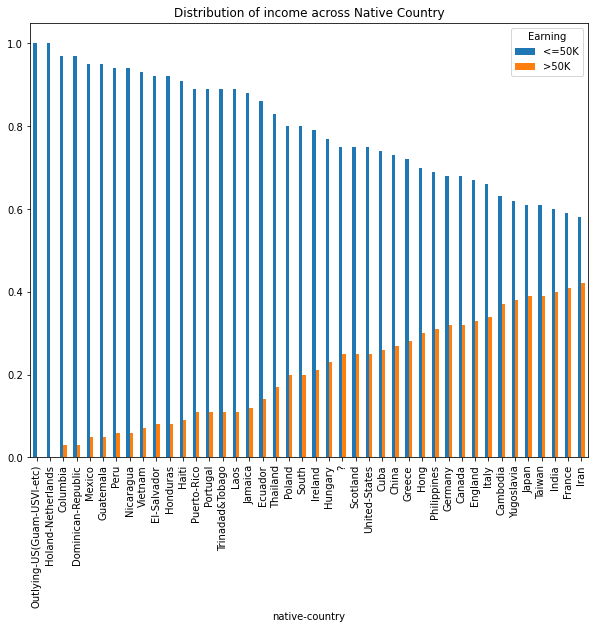

In [ ]:
plot_nativecountry=round(pd.crosstab(df['native-country'],df.Earning).div(pd.crosstab(df['native-country'], df.Earning).apply(sum,1),axis=0),2)
plot_nativecountry.sort_values(by = '>50K',inplace=True)
ax=plot_nativecountry.plot(kind='bar',title='Distribution of income across Native Country',figsize=(10,8))

In [ ]:
#No of missing values in each of the 3 categorical columns
#print(df['Workclass'].value_counts())
print(df['Workclass'].value_counts()['?'])
print(df['Occupation'].value_counts()['?'])
print(df['native-country'].value_counts()['?'])

1836
1843
583


In [ ]:
dfCopy = df.copy(deep=True)

In [ ]:
#Replace '?' with NaN
dfCopy.replace('?', np.NaN,inplace=True)

In [ ]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Earning         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#dfCopy['Workclass'].values_count()

In [ ]:
print(dfCopy['Workclass'].isna().sum())
print(dfCopy['Occupation'].isna().sum())
print(dfCopy['native-country'].isna().sum())

1836
1843
583


In [ ]:
dfMode = dfCopy.copy(deep=True)

In [ ]:
dfMode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Earning         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# dftest = pd.DataFrame([["a", "x",3],
#                    [np.nan, "y",4],
#                     ["a", np.nan,5],
#                     ["b", "y",6]], dtype="category")

# imp = SimpleImputer(strategy="most_frequent")
# dftest = pd.DataFrame(imp.fit_transform(dftest))
# #print(imp.fit_transform(dftest))
# dftest.head()
# dftest.info()

In [ ]:
# columns_numeric = ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
# columns_categorical = ['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'native-country']

In [ ]:
#Imputing each missing value with the most common label
#categcolumns = ['Workclass','Occupation','native-country']
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
dfMode = pd.DataFrame(imp.fit_transform(dfMode), columns=list(df.columns)).astype(df.dtypes.to_dict())
dfMode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Earning         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print(dfMode.iloc[[27]])

    Age Workclass  fnlwgt     Education  Education-num      Marital-Status  \
27   54   Private  180211  Some-college             10  Married-civ-spouse   

        Occupation Relationship                Race   Sex  Capital-gain  \
27  Prof-specialty      Husband  Asian-Pac-Islander  Male             0   

    Capital-loss  Hours-per-week native-country Earning  
27             0              60          South    >50K  


In [ ]:
dfMode["Earning"].value_counts()

<=50K    24720
>50K      7841
Name: Earning, dtype: int64

In [ ]:
training_label=dfMode["Earning"].map({'<=50K':0,'>50K':1})  #just to give binary labels
dfMode.drop(["Earning"],axis=1,inplace=True)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# sm = SMOTE(random_state=42)
# dfMode, training_label = sm.fit_resample(dfMode, training_label)
# dfMode.info()
# print('Resampled dataset shape %s' % Counter(training_label))

In [ ]:
training_label

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Earning, Length: 32561, dtype: int64

In [ ]:
columns_numeric = ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
# columns_categorical = ['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'native-country']

In [ ]:
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()
# X_numeric_std = pd.DataFrame(data=scaler.fit_transform(dfMode[columns_numeric]), columns=columns_numeric)
# dfMode = pd.merge(X_numeric_std, dfMode[columns_categorical], left_index=True, right_index=True)

In [ ]:
# dfMode.info()

In [ ]:
# dfMode['Age'].value_counts()

In [ ]:
# pd.get_dummies(dfMode.select_dtypes('object'))

In [ ]:
#Data normalization on numerical columns

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(dfMode.select_dtypes("int64"))  
train_data = scaler.transform(dfMode.select_dtypes("int64"))  
dfModeNum=pd.DataFrame(train_data,columns=columns_numeric)
dfModeNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   Education-num   32561 non-null  float64
 3   Capital-gain    32561 non-null  float64
 4   Capital-loss    32561 non-null  float64
 5   Hours-per-week  32561 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


In [ ]:
dfModeNum.set_index(dfModeNum.index,inplace=True)

In [ ]:
dfModeNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   Education-num   32561 non-null  float64
 3   Capital-gain    32561 non-null  float64
 4   Capital-loss    32561 non-null  float64
 5   Hours-per-week  32561 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


In [ ]:
dfMode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
#dfMode['Workclass'].value_counts()
dfMode['native-country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [ ]:
dfMode_categorical = pd.get_dummies(dfMode.select_dtypes('object'))
dfMode_categorical=dfMode_categorical.astype(dtype='category')
training_data_non_categorical = dfModeNum                                           #training_data.select_dtypes(exclude = 'object')

training_data_onehotencoded = pd.concat([training_data_non_categorical, dfMode_categorical], axis=1,join='inner')

In [ ]:
print(dfMode_categorical.columns.size)
print(dfModeNum.columns.size)
print(training_data_onehotencoded.info())

99
6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 105 entries, Age to native-country_Yugoslavia
dtypes: category(99), float64(6)
memory usage: 4.6 MB
None


In [ ]:
df['Earning'].value_counts()

<=50K    24720
>50K      7841
Name: Earning, dtype: int64

In [ ]:
print(df['Age'].unique().size)
print(df['fnlwgt'].unique().size)

73
21648


In [ ]:
training_label.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: Earning, Length: 32561, dtype: bool

In [ ]:
nCount=[]
for col in training_data_onehotencoded.columns:
  nCount.append(training_data_onehotencoded[col].isna().sum())
print(nCount)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
onehotarr = training_data_onehotencoded.to_numpy()
yarr = training_label.to_numpy()

In [ ]:
#HERE
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
onehotarr, yarr = sm.fit_resample(onehotarr, yarr)
training_data_onehotencoded = pd.DataFrame(onehotarr, columns=training_data_onehotencoded.columns)
training_label = pd.Series(yarr)
training_data_onehotencoded.info()
#dfrocount = len(training_data_onehotencoded)
print(training_label)
print('Resampled dataset shape %s' % Counter(training_label))
#print("No of rows: ", dfrocount)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Columns: 105 entries, Age to native-country_Yugoslavia
dtypes: float64(105)
memory usage: 39.6 MB
0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Length: 49440, dtype: int64
Resampled dataset shape Counter({0: 24720, 1: 24720})


In [ ]:
dfrocount = len(training_data_onehotencoded)
print("No of rows: ", dfrocount)

No of rows:  49440


In [ ]:
nCount=[]
for col in training_data_onehotencoded.columns:
  nCount.append(training_data_onehotencoded[col].isna().sum())
print(nCount)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
training_data_onehotencoded['Age'].value_counts()

-0.189267    938
-0.335892    926
-0.555830    921
-0.115955    919
-0.262580    909
            ... 
 1.816268      1
-0.466662      1
 0.020619      1
 0.064683      1
 0.057937      1
Name: Age, Length: 15822, dtype: int64

In [ ]:
#Feature selection: Select K best features

from sklearn.feature_selection import SelectKBest,chi2
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=training_data_onehotencoded.shape[1])

training_selected_features=kbest_selector.fit_transform(training_data_onehotencoded,training_label)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = training_data_onehotencoded.columns.values[selected_cols]

training_selected_features=pd.DataFrame(training_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

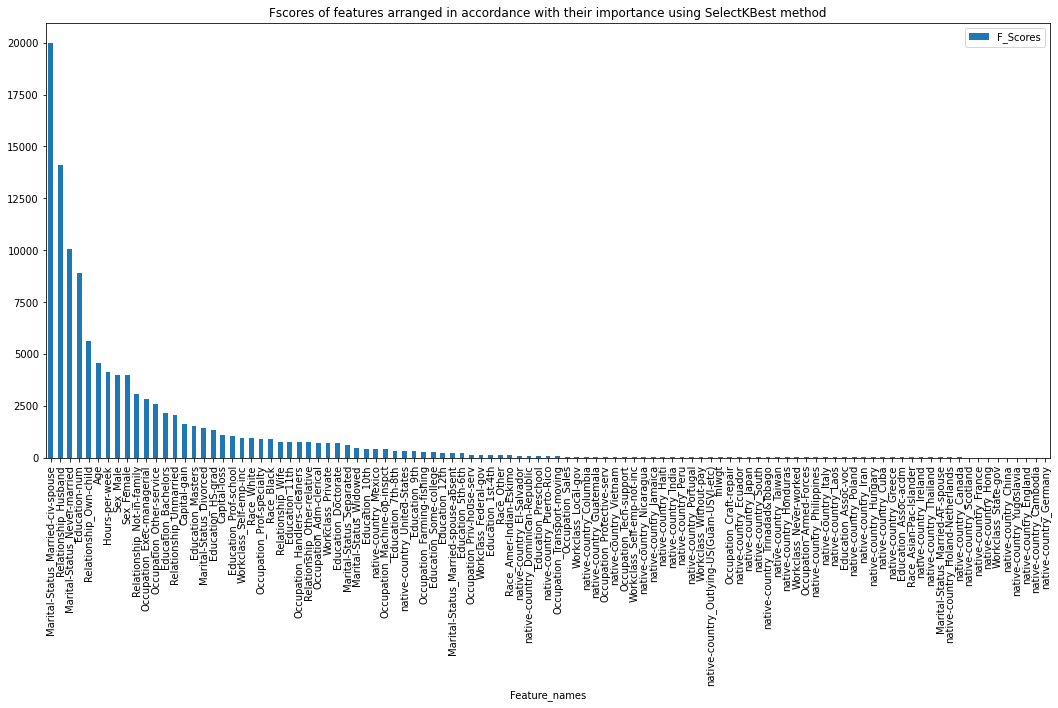

In [ ]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 30, we get a total of 30 features which have F scores beyond this value

kbest_selector=SelectKBest(k=30)
training_selected_features=kbest_selector.fit_transform(training_data_onehotencoded,training_label)

In [ ]:
print(type(training_selected_features))
print(training_selected_features.shape)

<class 'numpy.ndarray'>
(49440, 30)


In [ ]:
#Converting the dataframes to numpy array format
train_data_array=np.asarray(training_selected_features)
training_label_array=np.asarray(training_label)
print(train_data_array.shape)
print(training_label.shape)

(49440, 30)
(49440,)


In [ ]:
# Performing PCA
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(training_selected_features)

# training_features_transformed = pca.transform(training_selected_features)

# from matplotlib import pyplot as plt

# plt.plot(np.cumsum(pca.explained_variance_ratio_))   # As can be seen we take 30 components which captures almost all the variance
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative variance')
# plt.grid('True')
# '''

# # '''
# from sklearn.decomposition import PCA
# pca = PCA(0.95)   #Select those many components that capture 95% of the variance 
# pca.fit(training_selected_features)

# training_features_transformed = pca.transform(training_selected_features)

# train_data_array=np.asarray(training_features_transformed)
# training_label_array=np.asarray(training_label)




In [ ]:
test_data=pd.read_csv('/content/gdrive/MyDrive/adultTest.csv')

In [ ]:
print(test_data.columns)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'native-country',
       'Earning'],
      dtype='object')


In [ ]:
#removing spaces
for col in test_data.columns:
  if(test_data.dtypes[col]=='object'):
    arr = [ str(x).strip() for x in test_data[col].unique() ]
    arr1=[str(x).strip() for x in test_data[col]]
    test_data[col] = arr1

#removing ?'s
test_data.replace('?', np.NaN,inplace=True)
test_data.info()

testing_data=test_data.copy(deep=True)

#testing_data.dropna(axis=0,how='any',inplace=True)
testing_label=testing_data["Earning"].map({'<=50K.':0,'>50K.':1})  #just to give binary labels
testing_data.drop(["Earning"],axis=1,inplace=True)
print(testing_label)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital-Status  16281 non-null  object
 6   Occupation      15315 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  Earning         16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278

In [ ]:
#testing_data.drop(["Education"],axis=1,inplace=True)   #since it is a redundant feature
#imputing
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(strategy="most_frequent")
# testing_data = pd.DataFrame(imp.fit_transform(testing_data), columns=list(testing_data.columns)).astype(test_data.dtypes.to_dict())
testing_data['Workclass'] = testing_data['Workclass'].fillna('Private')
testing_data['Occupation'] = testing_data['Occupation'].fillna('Prof-specialty')
testing_data['native-country'] = testing_data['native-country'].fillna('United-States')
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
#scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(dfMode.select_dtypes("int64"))  
testing_data_arr = scaler.transform(testing_data.select_dtypes("int64"))  
testing_data_num=pd.DataFrame(testing_data_arr,columns=columns_numeric)
testing_data_num.info()
testing_data_num.set_index(testing_data_num.index,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  float64
 1   fnlwgt          16281 non-null  float64
 2   Education-num   16281 non-null  float64
 3   Capital-gain    16281 non-null  float64
 4   Capital-loss    16281 non-null  float64
 5   Hours-per-week  16281 non-null  float64
dtypes: float64(6)
memory usage: 763.3 KB


In [ ]:
testing_data.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
#testing_data['native-country'] = [' United States' if i == ' United-States'  else ' Out of United States' for i in testing_data['native-country']]
print(testing_data.columns.size)
testing_data_categorical = pd.get_dummies(testing_data.select_dtypes('object'))
print("here {0}".format(testing_data_categorical.columns.size));

14
here 98


In [ ]:
testing_data_categorical=testing_data_categorical.astype(dtype='category')
testing_data_onehotencoded = pd.concat([testing_data_num, testing_data_categorical], axis=1,join='inner')
trCol = list(training_data_onehotencoded.columns)
testCol = list(testing_data_onehotencoded.columns)
#print(trCol)
s = set(trCol)
temp3 = [x for x in testCol if x not in s]
print(temp3)    

[]


In [ ]:

missing_test_col_set=set(training_data_onehotencoded.columns.values.tolist()).difference(testing_data_onehotencoded.columns.values.tolist())
#print(list(missing_test_col_set))
for i in range(len(list(missing_test_col_set))):
    testing_data_onehotencoded.loc[ : , list(missing_test_col_set)[i]] = 0

print(dfMode_categorical.columns.size)
print(dfModeNum.columns.size)

99
6


In [ ]:
testing_selected_features=kbest_selector.transform(testing_data_onehotencoded)
# Below line of the code can be used when we want to do dimensionality reduction using PCA
#testing_features_transformed = pca.transform(testing_selected_features)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
dataComb = np.concatenate((train_data_array, np.array([training_label_array]).T), axis=1)

idx = np.random.randint(dfrocount, size=10000)
dataSubsampl = dataComb[idx,:]
#print(dataSubsampl)
train_data_array = dataSubsampl[:,0:30]
training_label_array = dataSubsampl[:,30]
print(train_data_array)
print(training_label_array)

[[-0.18926719  1.13473876 -0.14592048 ...  0.          0.
   1.        ]
 [ 0.47054606 -0.42005962 -0.14592048 ...  1.          0.
   1.        ]
 [-0.32800506  1.13473876 -0.14592048 ...  1.          0.
   1.        ]
 ...
 [ 0.02337418 -0.42005962 -0.14592048 ...  1.          0.
   1.        ]
 [-0.18926719  0.35733957  0.84227497 ...  1.          1.
   0.        ]
 [-0.48251753 -1.19745882 -0.14592048 ...  1.          0.
   1.        ]]
[0. 0. 1. ... 1. 1. 0.]


In [ ]:
print(training_label_array.shape)

(10000,)


In [ ]:
#Finding the optimal hyperparameters for SVM with linear kernel using cross validation
import sklearn                         
from sklearn import svm
from sklearn import model_selection,metrics
from statistics import mean

fold = model_selection.StratifiedKFold(n_splits = 5,shuffle = True)
C_val = np.logspace(-2,1,num=10)
gamma_val = np.logspace(-2,1,num=10)
size_gamma = np.size(gamma_val)
size_c = np.size(C_val)
optimal_gamma = -10 
optimal_C = -10
acc_max = -100
f1_max = -10
f1scorearr=[-1,-1]

for i in range(0,size_gamma):
    for j in range(0,size_c):
        current_gamma = gamma_val[i]
        #print(current_gamma)
        current_C = C_val[j]
        #print(current_C)
        temp=[]
        temp_f1=[];
        for tr_idx,val_idx in fold.split(train_data_array,training_label_array):
            X_train, X_val= train_data_array[tr_idx],train_data_array[val_idx]
            y_train, y_val= training_label_array[tr_idx],training_label_array[val_idx]
            svm_clf=svm.SVC(gamma=current_gamma,C=current_C,kernel='linear')
            svm_clf.fit(X_train,y_train)
            y_pred=svm_clf.predict(X_val)
            acc_val = metrics.accuracy_score(y_val,y_pred)
            f1_score = metrics.f1_score(y_val,y_pred);
            #print(acc_val)
            temp.append(acc_val)
            temp_f1.append(f1_score);
            
        if  mean(temp) > acc_max:
            acc_max = mean(temp)
            #optimal_gamma = gamma_val[i]
        #     optimal_C = C_val[j]

        if mean(temp_f1) > f1_max:
                f1_max = mean(temp_f1)
                optimal_gamma = gamma_val[i]
                optimal_C = C_val[j]
                f1scorearr = metrics.f1_score(y_val,y_pred,average=None)
print("Training f1 : ",f1scorearr);
print("Training accuracy {0}".format(acc_max));
print("Optimal Hyper parameters : gamma : ",optimal_gamma," C:",optimal_C)

Training f1 :  [0.78817204 0.81588785]
Training accuracy 0.8134
Optimal Hyper parameters : gamma :  0.46415888336127775  C: 0.021544346900318832


In [ ]:
#Testing using penalized SVM classifier with linear kernel 

svm_clf=svm.SVC(kernel='linear',C=optimal_C,gamma=optimal_gamma,class_weight='balanced')
svm_clf.fit(training_selected_features,training_label)

predicted_label = svm_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(testing_label,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

In [ ]:
#Testing using penalized SVM classifier with linear kernel

svm_clf=svm.SVC(kernel='linear',C=optimal_C,gamma=optimal_gamma,class_weight={0: 1, 1: 3})
svm_clf.fit(training_selected_features,training_label)

predicted_label = svm_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(testing_label,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

In [ ]:
## added new

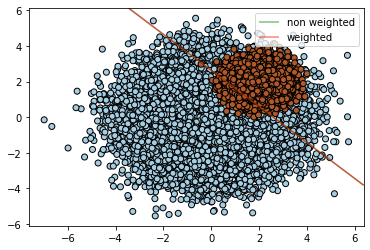

In [ ]:
# To visualize the performance difference between normal and weighted(penalized) SVM with linear kernel
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = training_label.value_counts().iloc[0]
n_samples_2 = training_label.value_counts().iloc[1]
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=optimal_C,gamma=optimal_gamma)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight='balanced',C=optimal_C,gamma=optimal_gamma)
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors=['green','black'], levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

#This portion of the code has been taken from the scikit-learn documnetation examples

In [ ]:
##added new

In [ ]:

#FInd best parameters for KNN using cross validation 

import sklearn                          
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection,metrics
from statistics import mean

folds = model_selection.StratifiedKFold(n_splits = 5,shuffle = True)
neighbors_num = np.arange(1,25)
acc_max = -1000
f1_max=-10
neighbors_opt = -10
f1scorearr=[-1,-1]
for i in range(0,np.size(neighbors_num)):
        #n_trial = g[i]
        temp=[]
        tempacc=[]
        for tr_ind,v_ind in folds.split(train_data_array,training_label_array):
            X_train, X_val = train_data_array[tr_ind],train_data_array[v_ind]
            y_train, y_val = training_label_array[tr_ind],training_label_array[v_ind]
            knn_clf = KNeighborsClassifier(n_neighbors = neighbors_num[i])
            knn_clf.fit(X_train,y_train)
            y_pred = knn_clf.predict(X_val)
            acc_val = metrics.accuracy_score(y_val,y_pred)
            f1_score = metrics.f1_score(y_val,y_pred)
            tempacc.append(acc_val)
            temp.append(f1_score)
            if mean(tempacc) > acc_max:
                acc_max = mean(tempacc)
                #neighbors_opt = neighbors_num[i]

            if mean(temp) > f1_max:
                f1_max = mean(temp)
                neighbors_opt = neighbors_num[i]
                f1scorearr = metrics.f1_score(y_val,y_pred,average=None)
                        
print("Optimal Value : No. of neighbors : ",neighbors_opt)
print("Training Accuracy : ",acc_max)
print("Training F1 Score : ",f1_max)
print("Training F1 Score Array: ",f1scorearr)


Optimal Value : No. of neighbors :  5
Training Accuracy :  0.859375
Training F1 Score :  0.8606452878297539
Training F1 Score Array:  [0.85165466 0.86064529]


In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors = neighbors_opt)
knn_clf.fit(training_selected_features,training_label)

predicted_label = knn_clf.predict(testing_selected_features)
testing_accuracyKNN=metrics.accuracy_score(testing_label,predicted_label)
testing_f1scoreKNN = metrics.f1_score(testing_label, predicted_label, average=None)
print("Test accuracy: ",testing_accuracyKNN)
print("Test f1 score: ",testing_f1scoreKNN)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

Test accuracy:  0.8045574596155027
Test f1 score:  [0.86565904 0.64150518]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87     12435
           1       0.57      0.74      0.64      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.78      0.75     16281
weighted avg       0.83      0.80      0.81     16281

0.7823483675173304


In [ ]:
print(type(list(testing_label)))
print("0: ", list(testing_label).count(0))

<class 'list'>
0:  12435


In [ ]:
#Using Naive Bayes (Gaussian) classifier 

import sklearn                          
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection,metrics
from statistics import mean

nb_clf=GaussianNB()
nb_clf.fit(training_selected_features,training_label)

#Test Data Accuracies
predicted_label = nb_clf.predict(testing_selected_features)
testing_accuracyNB=metrics.accuracy_score(testing_label,predicted_label)
testing_f1scoreNB = metrics.f1_score(testing_label, predicted_label, average=None)
print("Test accuracy: ",testing_accuracyNB)
print("Test f1 score: ",testing_f1scoreNB)

#Train Data Accuracies
predicted_labelTr = nb_clf.predict(training_selected_features)
training_accuracyNB=metrics.accuracy_score(training_label,predicted_labelTr)
training_f1scoreNB = metrics.f1_score(training_label,predicted_labelTr, average=None)
print("Train accuracy: ",training_accuracyNB)
print("Train f1 score: ",training_f1scoreNB)

#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

Test accuracy:  0.752656470732756
Test f1 score:  [0.81580753 0.62360968]
Train accuracy:  0.7961974110032363
Train f1 score:  [0.77764046 0.81189561]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     12435
           1       0.49      0.87      0.62      3846

    accuracy                           0.75     16281
   macro avg       0.72      0.79      0.72     16281
weighted avg       0.84      0.75      0.77     16281

0.7922819880225849


In [ ]:
#Find best parameters for Decision Tree using cross validation 

import sklearn                          
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection,metrics
from statistics import mean

folds = model_selection.StratifiedKFold(n_splits = 5,shuffle = True)
depth_val = np.arange(1,100)
acc_max = -1000
f1_max = -10
opt_dep = -10
f1scorearr=[-1,-1]
for i in range(0,np.size(depth_val)):
        temp=[]
        tempacc=[]
       # print(i)
       # n_trial = depth_val[i]
        for tr_ind,v_ind in folds.split(train_data_array,training_label_array):
            X_train, X_val = train_data_array[tr_ind],train_data_array[v_ind]
            y_train, y_val = training_label_array[tr_ind],training_label_array[v_ind]
            dectree_clf = DecisionTreeClassifier(max_depth = depth_val[i])
            dectree_clf.fit(X_train,y_train)
            y_pred = dectree_clf.predict(X_val)
            acc_val = metrics.accuracy_score(y_val,y_pred)
            f1_score = metrics.f1_score(y_val,y_pred)
            temp.append(f1_score)
            tempacc.append(acc_val)
            
            if mean(tempacc) > acc_max:
                acc_max = mean(tempacc)
                #neighbors_opt = neighbors_num[i]

            if mean(temp) > f1_max:
                f1_max = mean(temp)
                opt_dep = depth_val[i]
                f1scorearr = metrics.f1_score(y_val,y_pred,average=None)
print("Training Accuracy : ",acc_max)                    
print("Training F1 Score : ",f1_max)
print("Optimal Value : Max depth : ",opt_dep)
print("Training F1 Score Array: ",f1scorearr)    


Training Accuracy :  0.8630663430420712
Training F1 Score :  0.866908863821805
Optimal Value : Max depth :  16
Training F1 Score Array:  [0.86279821 0.87059055]


In [ ]:
#Decision Tree on test data

dectree_clf=DecisionTreeClassifier(max_depth = opt_dep)
dectree_clf.fit(training_selected_features,training_label)

predicted_label = dectree_clf.predict(testing_selected_features)
testing_accuracyDT=metrics.accuracy_score(testing_label,predicted_label)
testing_f1scoreDT = metrics.f1_score(testing_label, predicted_label)
print("Test accuracy: ",testing_accuracyDT)
print("Test f1 score: ",testing_f1scoreDT)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

Test accuracy:  0.8124808058473066
Test f1 score:  0.665131073818142
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     12435
           1       0.58      0.79      0.67      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.80      0.77     16281
weighted avg       0.84      0.81      0.82     16281

0.8041476206696037


In [ ]:
print(train_data_array.shape)
print(training_label_array.shape)

(49440, 30)
(49440,)


In [ ]:
dataComb = np.concatenate((train_data_array, np.array([training_label_array]).T), axis=1)

idx = np.random.randint(dfrocount, size=10000)
dataSubsampl = dataComb[idx,:]
#print(dataSubsampl)
train_data_array = dataSubsampl[:,0:30]
training_label_array = dataSubsampl[:,30]
print(train_data_array)
print(training_label_array)

[[-0.55583011 -0.42005962 -0.14592048 ...  1.          0.
   1.        ]
 [-0.09371025  0.74603917 -0.14592048 ...  1.          0.
   1.        ]
 [-1.58220629 -1.97485801 -0.14592048 ...  1.          0.
   1.        ]
 ...
 [ 1.48426059 -1.58615841 -0.14592048 ...  1.          0.
   1.        ]
 [-0.6291427  -0.42005962 -0.14592048 ...  1.          0.
   1.        ]
 [ 1.87774657  1.91213796 -0.14592048 ...  1.          0.
   1.        ]]
[1. 1. 0. ... 1. 0. 1.]


In [ ]:
#Find best parameters for Random Forest using cross validation 

import sklearn                          
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection,metrics
from statistics import mean

folds = model_selection.StratifiedKFold(n_splits = 10,shuffle = True)
estimators_num = np.arange(1,100)
acc_max = -1000
f1_max = -10
opt_est = -10
f1scorearr=[-1,-1]
for i in range(0,np.size(estimators_num)):
        temp=[]
        tempacc=[]
        #n_trial = g[i]
        for tr_ind,v_ind in folds.split(train_data_array,training_label_array):
            X_train, X_val = train_data_array[tr_ind],train_data_array[v_ind]
            y_train, y_val = training_label_array[tr_ind],training_label_array[v_ind]
            rand_forest_clf = RandomForestClassifier(n_estimators = estimators_num[i])
            rand_forest_clf.fit(X_train,y_train)
            y_pred = rand_forest_clf.predict(X_val)
            acc_val = metrics.accuracy_score(y_val,y_pred)
            f1_score = metrics.f1_score(y_val,y_pred)
            tempacc.append(acc_val)
            temp.append(f1_score)
            # if mean(temp) > acc_max:
            #     acc_max = mean(temp)
            #     opt_est = estimators_num[i]

            if mean(tempacc) > acc_max:
                acc_max = mean(tempacc)
                #neighbors_opt = neighbors_num[i]

            if mean(temp) > f1_max:
                f1_max = mean(temp)
                opt_est = estimators_num[i]
                f1scorearr = metrics.f1_score(y_val,y_pred,average=None)
print("Training Accuracy : ",acc_max)  
print("Training F1 Score : ",f1_max)                  
print("Optimal Value : No.of estimators : ",opt_est)
print("Training F1 Score Array: ",f1scorearr)        

Training Accuracy :  0.902
Training F1 Score :  0.9025844930417495
Optimal Value : No.of estimators :  44
Training F1 Score Array:  [0.90140845 0.90258449]


In [ ]:
print((training_selected_features).shape)

(49440, 30)


In [ ]:
#Random Forest on test data

rand_forest_clf=RandomForestClassifier(n_estimators = opt_est)
rand_forest_clf.fit(training_selected_features,training_label)

predicted_label = rand_forest_clf.predict(testing_selected_features)
testing_accuracyRF=metrics.accuracy_score(testing_label,predicted_label)
testing_f1scoreRF = metrics.f1_score(testing_label, predicted_label)
print("Test accuracy: ",testing_accuracyRF)
print("Test f1 score: ",testing_f1scoreRF)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

Test accuracy:  0.835329525213439
Test f1 score:  0.6538411878631376
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12435
           1       0.65      0.66      0.65      3846

    accuracy                           0.84     16281
   macro avg       0.77      0.77      0.77     16281
weighted avg       0.84      0.84      0.84     16281

0.7742073446508427


In [ ]:
predicted_label

array([0, 1, 0, ..., 0, 1, 0])